# Gauss Elimination for getting coefficients in mathematics trend

In [2]:
import numpy as np

# Forward elimination for polynomial regression model for an.
def gauss_elimination(a_matrix, b_matrix):
    if a_matrix.shape[0] != a_matrix.shape[1]:
        print("Matrix A is not square.")
        return None
    if a_matrix.shape[0] != b_matrix.shape[0]:
        print("Matrix A and B are not compatible.")
        return None
    n = a_matrix.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            factor = a_matrix[j, i] / a_matrix[i, i]
            for k in range(i, n):
                a_matrix[j, k] -= factor * a_matrix[i, k]
            b_matrix[j] -= factor * b_matrix[i]
    return a_matrix, b_matrix

def back_substitution(a_matrix, b_matrix):
    if a_matrix.shape[0] != a_matrix.shape[1]:
        print("Matrix A is not square.")
        return None
    if a_matrix.shape[0] != b_matrix.shape[0]:
        print("Matrix A and B are not compatible.")
        return None
    n = a_matrix.shape[0]
    x_matrix = np.zeros(n)
    for i in range(n-1, -1, -1):
        x_matrix[i] = b_matrix[i]
        for j in range(i+1, n):
            x_matrix[i] -= a_matrix[i, j] * x_matrix[j]
        x_matrix[i] /= a_matrix[i, i]
    return x_matrix

# for testing purpose only
a_matrix = np.array([[7, 1, 1],
                    [-3, 7, -1],
                    [-2, 5, 9],])
b_matrix = np.array([6, -26, 1])
a_matrix, b_matrix = gauss_elimination(a_matrix, b_matrix)
x_matrix = back_substitution(a_matrix, b_matrix)
print(x_matrix)

[ 1.04081633 -3.28571429  2.        ]


### Reading file from CSV

In [3]:
import pandas as pd

df = pd.read_csv('aol_data.csv')

print(df)

     M1    M2    M3    M4    M5    M6    M7    M8    M9   M10  ...   M135  \
0  1863  1614  2570  1685  2101  1811  2457  2171  2134  2502  ...  14917   

    M136   M137   M138   M139   M140   M141   M142   M143   M144  
0  15046  15556  15893  16388  16782  16716  17033  16896  17689  

[1 rows x 144 columns]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 144, 144) # 144 months
y = np.array(df.values.flatten()) # Production data - Flatten biar jadi 1D array

### 1. Trend bag's production data

Degree: 4, Mean Squared Error: 263.04


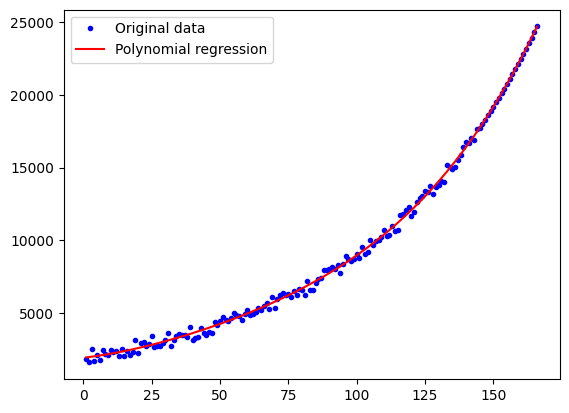

In [17]:
def polynomial_regression(degree):
    # Buat validasi kalau degreenya itu 0 atau lebih dari 144
    if degree == 0:
        print("Degree must be greater than 0.")
        return None
    elif degree > len(x):
        print("Degree must be less than or equal to the number of data points.")
        return None

    # Preprocessing data buat linear regression (sekalian cara dapetin a0 dan a1)
    x_bar = np.sum(x)/len(x)
    y_bar = np.sum(y)/len(y)
    a0 = np.sum(y * (x - x_bar)) / np.sum((x - x_bar)**2)
    a1 = y_bar - a0 * x_bar

    # Linear regression biasa kalau degreenya itu cuman 1
    y_pred = a0 * x + a1
    if degree == 1:
        model = y_pred 
        return model
    # Kalau degreenya lebih dari 1, kita pakai polynomial regression
    elif degree > 1:
        # Constructing matrixnya
        # Inisialisasi matrixnya dengan 0 dengan size degree+1 x degree+1
        # Karena kita punya degree+1 koefisien (Misal degree = 2 -> koefisien a0, a1, a2)
        a_matrix = np.zeros((degree+1, degree+1)) 
        # a_matrix itu gambarannya kayak gini
        # [ [0, 0, 0],
        #   [0, 0, 0],
        #   [0, 0, 0] ] notes: ini contoh kalau degree = 2

        # Inisialisasi matrix b dengan 0 dengan size degree+1
        b_matrix = np.zeros(degree+1)
        # b_matrix itu gambarannya kayak gini
        # [0, 0, 0] notes: ini contoh kalau degree = 2

        # Looping untuk mengisi matrix a dan b
        for i in range(degree+1):
            for j in range(degree+1):
                a_matrix[i, j] = np.sum(x**(i+j))
            b_matrix[i] = np.sum(y * x**i)

        # Solving the system of linear equations buat nyari koefisiennya
        a_matrix, b_matrix = gauss_elimination(a_matrix, b_matrix)
        a_matrix = back_substitution(a_matrix, b_matrix)

        # Constructing modelnya
        def model(x):
            y_pred = 0
            for i in range(degree+1): 
                y_pred += a_matrix[i] * x**i # y = a0 + a1*x + a2*x^2 + a3*x^3 + ...
            return y_pred
        
        return model

# Mean Squared error check buat modelnya (Buat nyari tau degree yang paling optimal)
# + Menghindari under/over fitting

def mean_squared_error(y, y_pred):
    error = np.sum((y - y_pred)**2) / len(y)
    return np.sqrt(error)

degree = 4
model = polynomial_regression(degree) # returning a function
y_pred = model(x) # predicting y using the model
error = mean_squared_error(y, y_pred) # calculating mean squared error
print(f"Degree: {degree}, Mean Squared Error: {error:.2f}")

# Plot data originalnya
plt.plot(x, y, 'ob', label='Original data', markersize=3)
# Plot data hasil regresi polynomial
plt.plot(x, y_pred, '-r', label='Polynomial regression')
plt.legend()
plt.show()

# Prediction data ke 25000 (bisection methods)

Production will reach 25000 at month 167
Warehouse should be build at month 154


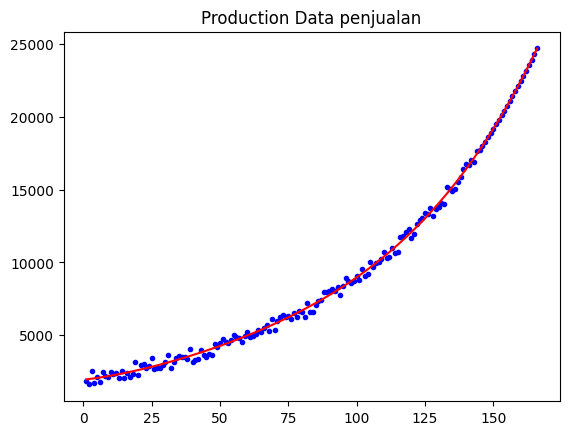

In [6]:
def bisect(func, x_min, x_max, tol=0.01, max_iter=15):
    f_min = func(x_min)
    if f_min * func(x_max) > 0:
        print("No root found in the given interval.")
        return None
    x_mid = (x_min + x_max) / 2
    f_mid = func(x_mid)
    iteration = 0
    while abs(f_mid) > tol and iteration < max_iter:
        if f_mid * f_min < 0:
            x_max = x_mid
        else:
            x_min = x_mid
        x_mid = (x_min + x_max) / 2
        f_mid = func(x_mid)
        iteration += 1
    return x_mid


def find_x(y_pred, model, x_min=1, x_max=250):
    # Define the function whose root we'll find
    def func(x):
        return model(x) - y_pred

    # Use the bisection method to find the root
    x = bisect(func, x_min, x_max)
    return x

x = find_x(25000, model)

print(f"Production will reach {25000} at month {x:.0f}") 
print(f"Warehouse should be build at month {x-13:.0f}")

# Plot data originalnya
x = np.linspace(1, int(x), int(x)) # Prediksi dari bulan ke-1 sampai bulan ke-x dimana x adalah bulan ke berapa produksi mencapai 25000
y = np.array((df.values.flatten())) # Production data - Flatten biar jadi 1D array
length = int(x[-1]) # Panjang array x
for i in range(145, length+1):
    y = np.append(y, model(i)) # Append data prediksi dari bulan ke-145 sampai ke-x ke array y


y_pred = model(x) # Polinomial Regression model

# Plotting
plt.title("Production Data penjualan")
plt.plot(x, y, 'ob', label='Original data', markersize=3)
plt.plot(x, y_pred, '-r', label='Polynomial regression')